In [1]:
# We need to include the module in the path
import pathlib
import sys
import os
module_path = pathlib.Path.cwd()
base_dir = module_path.parent.absolute()
sys.path.append(str(base_dir))
# Now we can import package modules
from src.analysis.analysis_functions import *

/mnt/data/jooste/env/bin/python3
/mnt/data/jooste/temp/seedlings/notebooks
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/mnt/data/jooste/env/lib/python3.6/site-packages', '/mnt/data/jooste/env/lib/python3.6/site-packages/IPython/extensions', '/mnt/data/jooste/.ipython']
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/mnt/data/jooste/env/lib/python3.6/site-packages', '/mnt/data/jooste/env/lib/python3.6/site-packages/IPython/extensions', '/mnt/data/jooste/.ipython', '/mnt/data/jooste/temp/seedlings']


In [9]:
model_dir = base_dir / "models" / "trained"
vanilla_df = get_dataframe(model_dir, taskname="seedlings_improve_stability_02")
new_df = get_dataframe(model_dir, taskname="seedlings_SGD_basic")

Index(['base_model_path', 'best_model_epoch', 'dataloader_num_workers',
       'develop', 'device', 'epochs', 'eval_batch_size', 'experiment_id',
       'learning_rate', 'logging_steps', 'max_seq_length', 'model_name',
       'model_type', 'momentum', 'optimiser', 'output_dir', 'patience',
       'run_id', 'seed', 'task_description', 'task_name', 'test_MAP',
       'test_file', 'train_batch_size', 'train_file', 'trained_model_path',
       'valid_ratio', 'weight_decay'],
      dtype='object')


<AxesSubplot:>

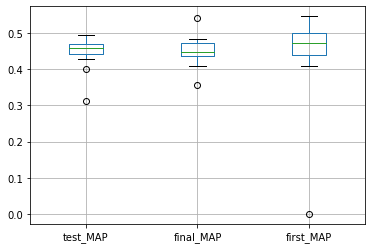

In [22]:
# This could probably be more elegantly done with groupby
import pandas as pd
results = pd.DataFrame(vanilla_df["test_MAP"])
finals = new_df["base_model_path"].str.contains(pat="_final")
results["final_MAP"] = new_df.loc[finals, "test_MAP"].tolist()
firsts = new_df["base_model_path"].str.contains(pat="_first")
results["first_MAP"] = new_df.loc[firsts, "test_MAP"].tolist()
results[results == 0] = float("nan")
results.boxplot()